In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl

## Challenger disaster data

<div dir="rtl"> אסון מעבורת החלל צ'לנג'ר היה אסון משמעותי בתולדות נאס"א. ב-28 בינואר 1986 במהלך משימה STS-51-L, התפוצצה באוויר מעבורת החלל צ'לנג'ר 73 שניות אחרי שהמריאה ממרכז החלל קנדי, פלורידה. האסון הביא למותם של שבעה אסטרונאוטים.
<div dir="rtl">    
    בעת המראת המעבורת היו נוכחים באתר השיגור אלפי צופים, שבאו לחזות בעוד פרק בהיסטוריית החלל של ארצות הברית. בתחילה, נראה היה שההמראה הסתיימה כשורה. אולם, רגעים ספורים לאחר השיגור, בגובה 16 ק"מ, אפף את המעבורת כדור אש עצום והיא צללה, מתפרקת, אל תוך האוקיינוס האטלנטי.
  <div dir="rtl">  
האסון נגרם כתוצאה מדליפה בשסתום. על סמך נתוני עבר נרצה לבדוק את הקשר בין הטמפרטורה בחוץ לבין הסיכוי לדליפה בשסתום.
      בכל חללית יש 6 שסתומים. בdataframe יש שלוש עמודות:
 <br/>      
intercept  - עמודה של 1ים      
<br/>
num_failure  - מספר שסתומים מתוך 6 שנפלו
<br/>
temp - הטמפרטורה בחוץ בפרנהייט.

In [8]:
## The path to the file
path = r'..\Data'
file_name = 'oring.csv'

In [9]:
## Extracting the data from the csv file into pandas
data = pd.read_csv(os.path.join(path, file_name))
data['intercept'] = np.ones(data.shape[0])
data.head(10)

,num_failure,temp,intercept
0,0,66,1.0
1,1,70,1.0
2,0,69,1.0
3,0,68,1.0
4,0,67,1.0
5,0,72,1.0
6,0,73,1.0
7,0,80,1.0
8,1,57,1.0
9,1,63,1.0


 <div dir="rtl"> תחילה נסתכל על הנתונים 

In [10]:
# Create a linear regression model
model = sm.OLS(data['num_failure'], data[['intercept', 'temp']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            num_failure   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     23.53
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           8.53e-05
Time:                        18:16:54   Log-Likelihood:                -10.095
No. Observations:                  23   AIC:                             24.19
Df Residuals:                      21   BIC:                             26.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1543      0.798      5.207      0.0

In [11]:
preds_df = pd.DataFrame([])
preds_df['temp'] = np.linspace(30,90,50)
preds_df['intercept'] = np.ones(50)

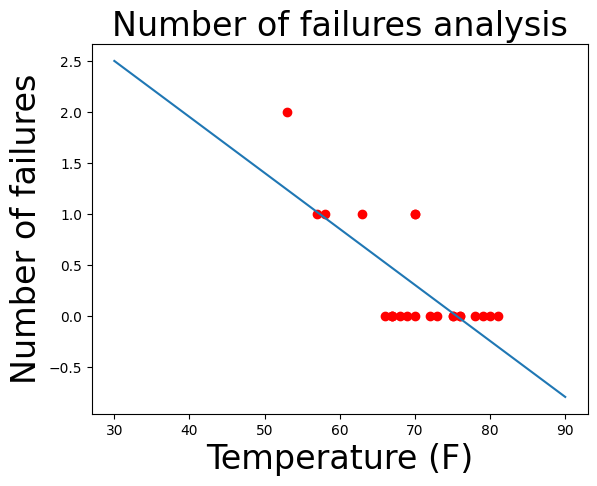

In [12]:
preds_df['preds_linear'] = results.predict(preds_df[['intercept', 'temp']])
## Preseting the data
plt.figure()
plt.scatter(data['temp'], data['num_failure'], color = 'red')
plt.plot(preds_df['temp'], preds_df['preds_linear'])
plt.title('Number of failures analysis', fontsize = 24)
plt.xlabel('Temperature (F)', fontsize = 24)
plt.ylabel('Number of failures', fontsize = 24)
plt.savefig('../figs/num_failures_with_0.png')
plt.show()

In [13]:
data_filtered = data.loc[data['num_failure']>0,:]

In [14]:
## Filtering the data
X_train_filtered = data.loc[data['num_failure']>0,'temp']

# X_train_filtered = sm.add_constant(X_train_filtered) 


In [15]:
data_filtered

,num_failure,temp,intercept
1,1,70,1.0
8,1,57,1.0
9,1,63,1.0
10,1,70,1.0
13,2,53,1.0
22,1,58,1.0


In [16]:
# Create a linear regression model
model_filtered = sm.OLS(data_filtered['num_failure'], data_filtered[['intercept', 'temp']])
# Fit the model
results_filtered = model_filtered.fit()
# Print summary statistics, including p-values for each coefficient
print(results_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:            num_failure   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     2.383
Date:                Sun, 22 Oct 2023   Prob (F-statistic):              0.198
Time:                        18:16:55   Log-Likelihood:                -1.1896
No. Observations:                   6   AIC:                             6.379
Df Residuals:                       4   BIC:                             5.963
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3442      1.418      2.358      0.0

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
data_filtered

,num_failure,temp,intercept
1,1,70,1.0
8,1,57,1.0
9,1,63,1.0
10,1,70,1.0
13,2,53,1.0
22,1,58,1.0


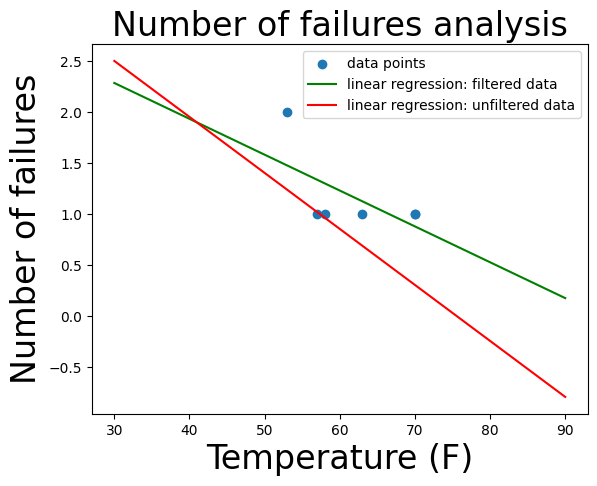

In [18]:
# data_filtered['preds_linear_filtered'] = results_filtered.predict(data_filtered[['intercept', 'temp']])
preds_df['preds_linear_filtered'] = results_filtered.predict(preds_df[['intercept', 'temp']])
# data['preds_linear_filtered'] = results_filtered.predict(data[['intercept', 'temp']])
## Preseting the data
plt.figure()
plt.scatter(data_filtered['temp'], data_filtered['num_failure'], label =  'data points')
plt.plot(preds_df['temp'], preds_df['preds_linear_filtered'], color = 'green', label =  'linear regression: filtered data')
plt.plot(preds_df['temp'], preds_df['preds_linear'], color = 'red', label =  'linear regression: unfiltered data')
plt.title('Number of failures analysis', fontsize = 24)
plt.xlabel('Temperature (F)', fontsize = 24)
plt.ylabel('Number of failures', fontsize = 24)
plt.legend()
plt.show()

 <div dir="rtl"> קיבלנו כאן בעצם משוואת רגרסיה מוטית, מכיוון שהתעלמנו מהמקרים שלא היו בכלל קריסות. השגיאה הזאת היא אחת הסיבות לאסון הזה.
      ניתן לראות את הגרף הירוק מול האדום. הירוק מתאר את המשוואה אחרי שפילטרנו את הdata ואילו הגרף האדום זה ללא פילטור. יש הבדל מהותי בין הגרפים כאשר הגרף הירוק מצביע על פחות כשפלים בטמפרוטורות נמוכות. אין סיבה שנרצה להתעלם מdata שיש לנו. 

 <div dir="rtl"> Survivalship biaes: יש מושג שנקרא כך המתאר מקרה שאנחנו משתמשים רק בdata ש"שרד". הכוונה פה רק למקומות בהם לא היו כשלים בכלל. זה מושג רחב מאד בעולם הסטטיטיקה והוא בא לידי ביטוי בהרבה תחומים בחיים כמו כלכלה, ביצועי מלחמה. כאשר מתעלמים מהdata שלא שרד מגיעים להחלטות לא נכונות. למטה מצורף סרטון המסביר את זה:
    
    
https://www.youtube.com/watch?v=ZyLVIvBidIA

<div dir="rtl">  הנתונים למעלה מראים כמה שסתומים קרסו עבור מספר טמפרטורות שונות. הגרף מראה כי ברמה הכללית טמפרוטרות נמוכות מגיעות עם יותר קריסות. ננסה לעשות משוואת רגרסיה החוזה את מספר השסתומים הקורסים כפונקציה של הטמפרטורה. 

# Logistic regression רגרסיה לוגיסטית

<div dir="rtl"> עד כה ניסינו לחזות את כמות השסתומים שכושלים. מה שבאמת מעניין זה הסיכוי שלפחות שסתום אחד ייכשל. ברגע שאחד נכשל המעבורת בסכנה מיידית.
    נסדר את הנתונים כך שכל פעם שיש לפחות כשל אחד ניתן לו את הערך 1 כלומר היה כשל, ואם לא היו בכלל ניתן לו את הערך 0.
    תחילה נסדר את הdata כך שיהיה בינארי. נעשה את בdataframe שנקרא data_for_logistic.

In [19]:
data_for_logistic = pd.DataFrame(data)
data_for_logistic['failure'] = data_for_logistic['num_failure'].apply(lambda x: 1 if x >= 1 else x)
data_for_logistic = data_for_logistic.loc[:, ['intercept' ,'failure','temp']]
data_for_logistic.head()

,intercept,failure,temp
0,1.0,0,66
1,1.0,1,70
2,1.0,0,69
3,1.0,0,68
4,1.0,0,67


In [20]:
# Create a linear regression model
model_logistic = sm.OLS(data_for_logistic['failure'], data_for_logistic[['intercept', 'temp']])
# Fit the model
results_logistic = model_logistic.fit()
# Print summary statistics, including p-values for each coefficient
print(results_logistic.summary())

                            OLS Regression Results                            
Dep. Variable:                failure   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     17.26
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           0.000449
Time:                        18:16:55   Log-Likelihood:                -6.8068
No. Observations:                  23   AIC:                             17.61
Df Residuals:                      21   BIC:                             19.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.1192      0.692      4.510      0.0

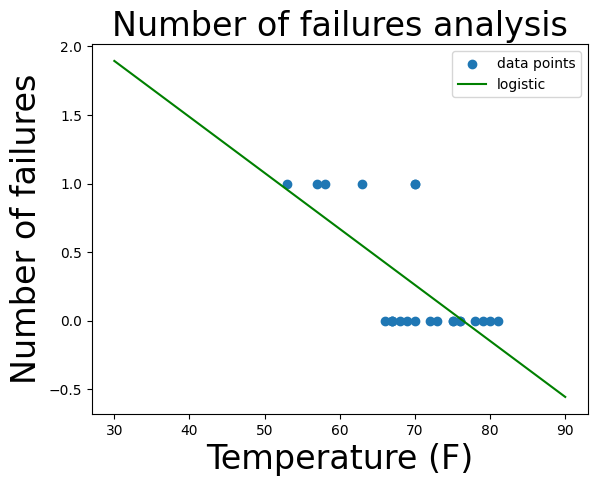

In [21]:
# data_filtered['preds_linear_filtered'] = results_filtered.predict(data_filtered[['intercept', 'temp']])
preds_df['preds_logistic'] = results_logistic.predict(preds_df[['intercept', 'temp']])
# data['preds_linear_filtered'] = results_filtered.predict(data[['intercept', 'temp']])
## Preseting the data
plt.figure()
plt.scatter(data_for_logistic['temp'], data_for_logistic['failure'], label =  'data points')
plt.plot(preds_df['temp'], preds_df['preds_logistic'], color = 'green', label =  'logistic')
plt.title('Number of failures analysis', fontsize = 24)
plt.xlabel('Temperature (F)', fontsize = 24)
plt.ylabel('Number of failures', fontsize = 24)
plt.legend()
plt.show()

<div dir="rtl">  כאשר עשינו רגרסיה ליניארית עם הנתונים ניתן לראות כי קיבלו תחזיות שליליות וגדולות מ-1, למרות שמדובר בהסתברות!

<div dir="rtl">  זו בעיה רצינית ולכן נפנה לשיטות סטטיסטיות אחרות, כאלו שיבטיחו לנו לקבל תחזיות שהן בתחום האפשרי. 
    לשם קח נפנה לרגרסיה לוגיסטית.

<div dir="rtl"> 
    
## מהי רגרסיה לוגסיטית?
    רגרסיה לוגיסטית היא מודל סטטיסטי המתאר קשר אפשרי בין משתנה איכותי/קטגורי (כלומר, לא כזה שניתן למדוד באופן כמותי), המכונה "המשתנה המוסבר", ובין משתנים אחרים המכונים "משתנים מסבירים". המשתנים המסבירים יכולים להיות איכותיים או כמותיים.  שימוש נפוץ במודל הוא כאשר המשתנה המוסבר הוא בינארי ("0" או "1", למשל - "ירד גשם" או "לא ירד גשם") והמשתנים המסבירים הם בעלי ערך ספיר כלשהוא (למשל - הטמפרטורה). במקרים אלו הגרף שנוצר מתאר את ההסתברות להתרחשות של מאורע כלשהוא, כתלות במשתנים הספירים. המודל מאפשר לאמוד את מידת ההשפעה של שינוי בערכו של כל אחד מהמשתנים המסבירים על ערכו של המשתנה המוסבר. במילים אחרות, המודל מאפשר לאמוד מתאמים בין המשתנים המסבירים למשתנה המוסבר. 

<div dir="rtl"> בשביל להבטיח שהמודל תמיד יתן ערך בין 0 ל-1 כיאה להסתברות, נשתמש באיזו פונקציה שנקראת logistic (בעולם של רשתות ניורונים קוראים לזה sigmoid). הפונקצייה נראית כך:
$$ logistic(x) = \frac{1}{1+e^{-x}} $$
    
    נראה ויזואלית איך שזה נראה: 

In [22]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [23]:
logistic(-99999999), logistic(99999999)

C:\Users\user\AppData\Local\Temp\ipykernel_15816\3220956541.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


(0.0, 1.0)

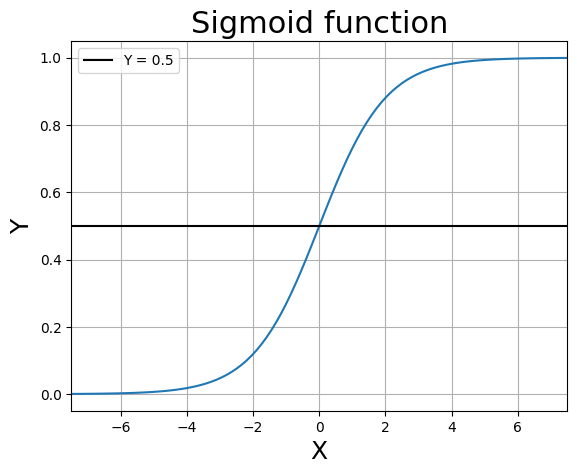

In [24]:
x_vals = np.linspace(-7.5, 7.5, 100)
plt.figure()
plt.plot(x_vals, logistic(x_vals))
plt.xlabel('X', fontsize = 18)
plt.ylabel('Y',  fontsize = 18)
plt.plot(x_vals,0.5*np.ones(100), color = 'black', label = 'Y = 0.5')
plt.grid()
plt.title('Sigmoid function',  fontsize = 22)
plt.xlim(-7.5,7.5)
plt.legend()
plt.show()

<div dir="rtl">
    
## אז איך משתמשים בפונקציה הלוגיסטית הזאת כדי לעשות משוואת רגרסיה?

<div dir="rtl">  בדוגמא למעלה הוצגה המשוואה הלוגיסטית עבור X, במקרה של רגרסיה לוגיסטית המשוואה תראה כך:
נרצה לחזות את ההסתברות לכשל, נסמן זאת על ידי $\hat{p}_{failure}$. ברגרסיה לוגיסטית גם שם יש משוואה ליניאירית. היא נראית כך:
    
$$ x = b_0 +b_1 *temperature,   $$
    
    
$$ \hat{p}_{failure} =  logistic(x) = logistic(b_0 +b_1 *temperature) = \frac{1}{1+e^{-(b_0 +b_1 *temperature)}} $$

<div dir="rtl"> גם כאן יש לנו 2 פרמטרים למצוא. אנחנו שואפים למצוא את הערכים בעזרת נתנוני הבעיה. ברגרסיה ליניארית מצאונו את הפרמרטים על ידי מזעור השגיאות הריבעויות. ברגרסיה לוגיסטית שיטה זו לא אפשרית ומשתמשים בשיטה אחרת שנקראת נראות מקסימלית (Maximum likelihood).  
    ננסה להבין את הרעיון של נראות מקסימלית על ידי דוגמא. נניח כי אנחנו רוצים למצוא את ההסתברות ששחקן כדורסל, נקרא לו סטף קרי יקלע לסל בזריקה בודדת. יהי n מספק הזריקות ויהי x מספק הקליעות. ננסה לשערך את הסיכוי לקליעה.
    נסה למצוא את פונקציית הנראות ונראה איך הוא עוזרת לנו לשערך את הפונקצייה. נסמן ב$p$ את ההסבתרות לקליעה.

$$ L(p) = p^x (1-p)^{n-x} $$


<div dir="rtl">   מסתבר שהערך של p שממקסם את הפונקצייה הזאת הוא:
    
$$ p =  \frac{x}{n} $$

<div dir="rtl"> אבל אנחנו בבעיה קצת יותר מסובכת, הפונקצייה שאנחנו רוצים למקסם היא:
    
$$ L(b_0, b_1) = \left(\frac{1}{1+e^{-(b_0 +b_1 *temperature)}}\right)^n + \left(1-\frac{1}{1+e^{-(b_0 +b_1 *temperature)}}\right)^{n-x}$$ 

<div dir="rtl"> בניגוד לדוגמא למעלה או למקרה של רגרסיה ליניארית, אין לנו ביטוי שסגור שמצאר את הערכים של $b_0$ ו-$b_1$. אלא, יש שיטות אופטימציה שיכולות למצוא לנו הערך הסופי. לכן, פשוט נשתמש בחבילה שתצמא את הערכים האלה בשבילנו. נראה למטה איך עושים את זה:

<div dir="rtl">
אנחנו נשתמש בחבילה שנקראת sm.Logit בצורה דומה שהשתמשנו בחבילה של sm.OLS
    



In [25]:
data_for_logistic.head()

,intercept,failure,temp
0,1.0,0,66
1,1.0,1,70
2,1.0,0,69
3,1.0,0,68
4,1.0,0,67


In [26]:
model_logistic = sm.Logit(data_for_logistic['failure'], data_for_logistic[['intercept', 'temp']])
result_logistic = model_logistic.fit()
print(result_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.307452
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                  0.4643
Time:                        18:16:56   Log-Likelihood:                -7.0714
converged:                       True   LL-Null:                       -13.201
Covariance Type:            nonrobust   LLR p-value:                 0.0004629
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.2216     11.485      2.022      0.043       0.712      45.731
temp          -0.3576      0.

<div dir="rtl">
    
## פלט של רגרסיה לוגיסטית

<div dir="rtl">
מעניין אותנו את הערכים של המקדמים: intercept ו- temp. במקרה שלנו זה intercept = 23.22 ו-temp = -0.3576
נרצה לדעת אם הם נכנסים למודל על סמך מבחן סטטיסטי שנקרא מבחן Wald. נבדוק עם הערך תחת $P>|z|$ קטן מ0.05. הערך הזה מייצג את הpvalue כמו מקודם.
במקרה של רגרסיה לוגסיטית אין לנו מדד אינטואיטיבי לבדיקת טיב המודל כמו $R^2$. יש 3 מודלים: 

<div dir="rtl">
Pseudo R-squared: תחליף מסוים ל$R^2$. ערך בין 0 ל -1, ככל שגדול יותר עדיף.

In [27]:
result_logistic.prsquared

0.4643362458572028

<div dir="rtl">
Akaike Information Criterion (AIC): מדד של טיב התאמה - הערך המספרי לא יגיד לנו משהו אינטואיטיבי, מדד טוב להשוואת מודלים. ככל שנמוך יותר כך עדיף. 

In [28]:
result_logistic.aic 

18.14279081403978

<div dir="rtl">
Bayesian Information Criterion (BIC): מדד של טיב התאמה - הערך המספרי לא יגיד לנו משהו אינטואיטיבי, מדד טוב להשוואת מודלים. ככל שנמוך יותר כך עדיף. דומה לAIC. ישנם הבדלים קלים בין שני המדדים, לא ניכנס לזה עכשיו.

In [29]:
result_logistic.bic 

20.41377924589808

<div dir="rtl">
    
## תחזית בעזרת רגרסיה לוגיסטית
<div dir="rtl">
    נרצה לחזות הסתברות לכשל עבור כל מיני ערכים. נעשה זאת כמו במקרה של רגרסיה ליניארית בעזרת פונקציית predict.  

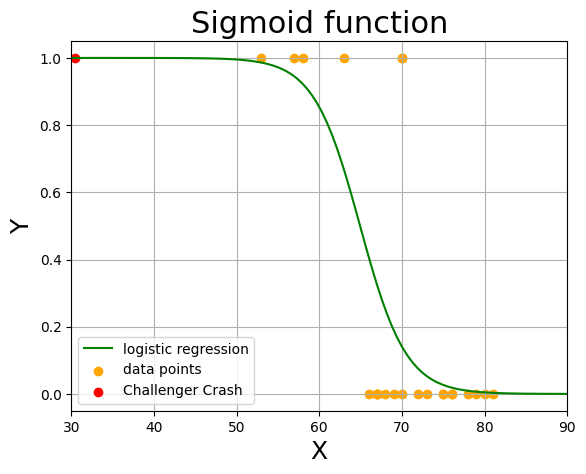

In [30]:
x_vals = np.linspace(30, 90, 100)

data_pred = pd.DataFrame([])
data_pred['intercept'] = np.ones(x_vals.shape[0])
data_pred['temp'] = x_vals
data_pred['failure_prob'] = result_logistic.predict(data_pred[['intercept', 'temp']])

plt.figure()
plt.plot(data_pred['temp'], data_pred['failure_prob'], label = 'logistic regression', color = 'green')
plt.scatter(data_for_logistic['temp'], data_for_logistic['failure'], label =  'data points', color = 'orange')
plt.scatter(30.5, 1, label = 'Challenger Crash', color = 'red')
plt.xlabel('X', fontsize = 18)
plt.ylabel('Y',  fontsize = 18)
plt.grid()
plt.title('Sigmoid function',  fontsize = 22)
plt.xlim(30,90)
plt.legend()
plt.show()

<div dir="rtl"> עכשיו המודל נראה יותר הגיוני

In [31]:
data_for_logistic = pd.DataFrame([])
for ind in range(data.shape[0]):
    num_failure = data.loc[ind, 'num_failure']
    num_not_failure = 6 - num_failure
    for ind1 in range(num_failure):
        curr_ind  = data_for_logistic.shape[0]
        data_for_logistic.loc[curr_ind, 'failure'] = 1
        data_for_logistic.loc[curr_ind, 'temp'] = data.loc[ind, 'temp']
    
    for ind1 in range(num_not_failure):
        curr_ind  = data_for_logistic.shape[0]
        data_for_logistic.loc[curr_ind, 'failure'] = 0
        data_for_logistic.loc[curr_ind, 'temp'] = data.loc[ind, 'temp']


    
## Logit function: לוגיט

<div dir="rtl"> פונקציית הלוגיט מוגדרת כך:
    
$$ Logit(p) = Log(\frac{p}{1-p}) = b_0 +b_1*x $$
    where
$$ p = \frac{1}{1+e^{b_0 + b_1*x}} $$    

<div dir="rtl"> כלומר ה-Logit מוגדר להיות המשוואה הלינאירית בתוך הlogistic function.